Utiliser ANACONDA pour TensorFlow

In [1]:
import tensorflow as tf
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Importez mdates ici
import seaborn as sns


ACCEDER API RTE

In [2]:
import base64

client_id = 'ab72b607-4ef7-4601-9ed7-0fa4a8e75a98'
client_secret = '33118b6d-1320-47df-8374-cf856dab43db'

# Encode en base64
credentials = f"{client_id}:{client_secret}"
encoded_credentials = base64.b64encode(credentials.encode()).decode()

print(f"Encoded credentials: {encoded_credentials}")
import requests

# Endpoint d'authentification
auth_url = 'https://digital.iservices.rte-france.com/token/oauth/'

# En-tête d'autorisation
headers = {
    'Authorization': f'Basic {encoded_credentials}',
    'Content-Type': 'application/x-www-form-urlencoded'
}

# Requête pour obtenir le jeton
response = requests.post(auth_url, headers=headers)

# Vérifiez si la requête a réussi
if response.status_code == 200:
    token = response.json().get('access_token')
    print(f"Jeton OAuth obtenu : {token}")
else:
    print(f"Erreur lors de l'obtention du jeton : {response.status_code}")
    print(f"Réponse du serveur : {response.text}")

headers = {
    'Authorization': f'Bearer {token}'
}

# Fonction pour récupérer les données d'une ressource
def get_data(resource_url):
    response = requests.get(resource_url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erreur lors de la récupération des données : {response.status_code}")
        print(f"Réponse du serveur : {response.text}")
        return None

Encoded credentials: YWI3MmI2MDctNGVmNy00NjAxLTllZDctMGZhNGE4ZTc1YTk4OjMzMTE4YjZkLTEzMjAtNDdkZi04Mzc0LWNmODU2ZGFiNDNkYg==
Jeton OAuth obtenu : 2w7HtAZvFxY0bnmsl35ctLzU1I8qIpPv83b7yzz9dz1XUjr2QA9Wmw


In [3]:
# En-tête d'autorisation
headers = {
    'Authorization': f'Bearer {token}'
}

# URL de la ressource avec les paramètres de date pour l'année 2024
url = 'https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/imbalance_data'
params = {
    'start_date': '2024-01-01T00:00:00Z',
    'end_date': '2024-01-31T23:59:59Z'
}

# Fonction pour récupérer les données
def get(url, headers, params):
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erreur lors de la récupération des données : {response.status_code}")
        print(f"Réponse du serveur : {response.text}")
        return None


In [4]:
params = {
    'start_date': '2024-01-01T00:00:00Z',
    'end_date': '2024-01-31T23:59:59Z'
}


params2 = {
    'start_date': '2024-12-01T00:00:00Z',
    'end_date': '2024-12-31T23:00:00Z'
}

url1= 'https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/tso_offers'
url2= 'https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/imbalance_data'
url3= 'https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/prices'
url4= 'https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/lead_times'
url5='https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/volumes_per_reasons'
url6='https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/volumes_per_entity_type'
url7='https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/volumes_per_energy_type'
url8='https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/standard_rr_data'
url9='https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/standard_afrr_data'
url10='https://digital.iservices.rte-france.com/open_api/balancing_energy/v4/afrr_marginal_price'

URL=[url1,url2,url3,url4,url5,url6,url7,url8,url9,url10]
url
def RTE_One_Year(url):
    L=[]
    for i in range(12,0,-1):
        if i<10:
            params['start_date']=params['start_date'][0:5]+str(0)+str(i)+params['start_date'][7:20]
            params['end_date']=params['end_date'][0:5]+str(0)+str(i)+params['end_date'][7:20]
        if i>=10:
            if i==12:
                params=params2.copy()
            else:
                params['start_date']=params['start_date'][0:5]+str(i)+params['start_date'][7:20]
                params['end_date']=params['end_date'][0:5]+str(i)+params['end_date'][7:20]
            # print(params)
        data = get(url, headers, params)
        # data['imbalance_data'][0]['values']
        df=pd.DataFrame(data[next(iter(get(url, headers, params)))][0]['values'])
        L.append(df)
    final_df = pd.concat(L, ignore_index=True)
    return final_df

def RTE_One_Year_2(url):
    L=[]
    for i in range(12,0,-1):
        if i<10:
            params['start_date']=params['start_date'][0:5]+str(0)+str(i)+params['start_date'][7:20]
            params['end_date']=params['end_date'][0:5]+str(0)+str(i)+params['end_date'][7:20]
        if i>=10:
            if i==12:
                params=params2
            else:
                params['start_date']=params['start_date'][0:5]+str(i)+params['start_date'][7:20]
                params['end_date']=params['end_date'][0:5]+str(i)+params['end_date'][7:20]
            # print(params)
        data = get(url, headers, params)
        # data['imbalance_data'][0]['values']
        df=pd.DataFrame(data[next(iter(get(url, headers, params)))][0]['values'])
        L.append(df)
    final_df = pd.concat(L, ignore_index=True)
    return final_df



In [5]:
RTE_One_Year(url2)

,start_date,end_date,imbalance,system_trend,positive_imbalance_settlement_price,negative_imbalance_settlement_price,missing_data_list,updated_date
0,2024-12-31T23:30:00+01:00,2025-01-01T00:00:00+01:00,-536.75,HAUSSE,182.85,211.69,N/A,2025-03-14T20:30:40+01:00
1,2024-12-31T23:00:00+01:00,2024-12-31T23:30:00+01:00,-838.89,HAUSSE,191.53,221.73,N/A,2025-03-14T20:30:40+01:00
2,2024-12-31T22:30:00+01:00,2024-12-31T23:00:00+01:00,-588.26,HAUSSE,21.89,25.35,N/A,2024-12-31T23:03:29+01:00
3,2024-12-31T22:00:00+01:00,2024-12-31T22:30:00+01:00,-278.28,HAUSSE,52.52,60.80,N/A,2025-01-01T15:54:38+01:00
4,2024-12-31T21:30:00+01:00,2024-12-31T22:00:00+01:00,431.34,BAISSE,22.43,25.97,N/A,2024-12-31T22:03:24+01:00
...,...,...,...,...,...,...,...,...
17539,2024-01-01T03:00:00+01:00,2024-01-01T03:30:00+01:00,-370.44,HAUSSE,30.67,35.53,N/A,2024-02-08T18:48:01+01:00
17540,2024-01-01T02:30:00+01:00,2024-01-01T03:00:00+01:00,37.41,BAISSE,-18.46,-15.94,N/A,2024-02-08T18:48:01+01:00
17541,2024-01-01T02:00:00+01:00,2024-01-01T02:30:00+01:00,327.68,BAISSE,-17.32,-14.94,N/A,2024-02-08T18:48:01+01:00
17542,2024-01-01T01:30:00+01:00,2024-01-01T02:00:00+01:00,692.11,BAISSE,-16.03,-13.83,N/A,2024-02-08T18:48:01+01:00


In [6]:
RTE_One_Year(url3)

C:\Users\adamh\AppData\Local\Temp\ipykernel_5268\3213230143.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(L, ignore_index=True)


,start_date,end_date,upward_weighted_average_price,downward_weighted_average_price,upward_marginal_price,downward_marginal_price,upward_weighted_average_price_as,downward_weighted_average_price_as,upward_weighted_average_price_margin,downward_weighted_average_price_margin,upward_weighted_average_price_mfrr,downward_weighted_average_price_mfrr,upward_weighted_average_price_rr,downward_weighted_average_price_rr,upward_weighted_average_price_afrr_activated_for_fr,downward_weighted_average_price_afrr_activated_for_fr,terre_clearing_price,upward_weighted_average_price_meas,downward_weighted_average_price_meas,updated_date
0,2024-12-31T23:30:00+01:00,2025-01-01T00:00:00+01:00,197.27,242.84,331.43,23.21,NaN,7.25,NaN,NaN,NaN,NaN,NaN,33.22,None,None,None,NaN,NaN,2025-03-14T20:30:37+01:00
1,2024-12-31T23:00:00+01:00,2024-12-31T23:30:00+01:00,206.63,409.79,409.79,125.30,NaN,7.59,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,2025-03-14T20:30:37+01:00
2,2024-12-31T22:30:00+01:00,2024-12-31T23:00:00+01:00,23.62,25.08,23.88,69.65,NaN,7.59,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,2024-12-31T23:03:26+01:00
3,2024-12-31T22:00:00+01:00,2024-12-31T22:30:00+01:00,56.66,39.30,56.68,-5.75,NaN,7.92,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,2024-12-31T22:33:30+01:00
4,2024-12-31T21:30:00+01:00,2024-12-31T22:00:00+01:00,10.68,24.20,-16.07,10.68,NaN,7.92,NaN,NaN,NaN,NaN,NaN,30.56,None,None,None,NaN,NaN,2024-12-31T22:03:20+01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,2024-01-01T03:00:00+01:00,2024-01-01T03:30:00+01:00,33.10,-3.05,60.20,-17.40,NaN,-10.19,NaN,NaN,30.03,NaN,NaN,-13.50,None,None,None,NaN,NaN,2024-01-01T04:05:06+01:00
17540,2024-01-01T02:30:00+01:00,2024-01-01T03:00:00+01:00,35.62,-17.20,60.20,-27.40,NaN,-10.19,NaN,NaN,40.09,NaN,NaN,-19.40,None,None,None,NaN,NaN,2024-01-01T03:34:52+01:00
17541,2024-01-01T02:00:00+01:00,2024-01-01T02:30:00+01:00,69.79,-16.13,99.80,-27.40,NaN,-10.19,NaN,NaN,NaN,NaN,NaN,-18.77,None,None,None,NaN,NaN,2024-01-01T02:37:14+01:00
17542,2024-01-01T01:30:00+01:00,2024-01-01T02:00:00+01:00,-4.56,-14.93,-4.56,-37.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.04,None,None,None,NaN,NaN,2024-01-01T02:05:03+01:00


In [7]:
Price=RTE_One_Year(url3)

C:\Users\adamh\AppData\Local\Temp\ipykernel_5268\3213230143.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(L, ignore_index=True)


In [ ]:
# Price.columns

Index(['start_date', 'end_date', 'upward_weighted_average_price',
       'downward_weighted_average_price', 'upward_marginal_price',
       'downward_marginal_price', 'upward_weighted_average_price_as',
       'downward_weighted_average_price_as',
       'upward_weighted_average_price_margin',
       'downward_weighted_average_price_margin',
       'upward_weighted_average_price_mfrr',
       'downward_weighted_average_price_mfrr',
       'upward_weighted_average_price_rr',
       'downward_weighted_average_price_rr',
       'upward_weighted_average_price_afrr_activated_for_fr',
       'downward_weighted_average_price_afrr_activated_for_fr',
       'terre_clearing_price', 'upward_weighted_average_price_meas',
       'downward_weighted_average_price_meas', 'updated_date'],
      dtype='object')

In [12]:
Price.shape
Price['start_date'].isnull().sum()

0

Index(['start_date', 'end_date', 'upward_weighted_average_price',
       'downward_weighted_average_price', 'upward_marginal_price',
       'downward_marginal_price', 'upward_weighted_average_price_as',
       'downward_weighted_average_price_as',
       'upward_weighted_average_price_margin',
       'downward_weighted_average_price_margin',
       'upward_weighted_average_price_mfrr',
       'downward_weighted_average_price_mfrr',
       'upward_weighted_average_price_rr',
       'downward_weighted_average_price_rr',
       'upward_weighted_average_price_afrr_activated_for_fr',
       'downward_weighted_average_price_afrr_activated_for_fr',
       'terre_clearing_price', 'upward_weighted_average_price_meas',
       'downward_weighted_average_price_meas', 'updated_date'],
      dtype='object')


C:\Users\adamh\AppData\Local\Temp\ipykernel_5268\865861190.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  date = pd.to_datetime(Price[col[0]])  # Assurez-vous que la colonne 'Date' est au format datetime


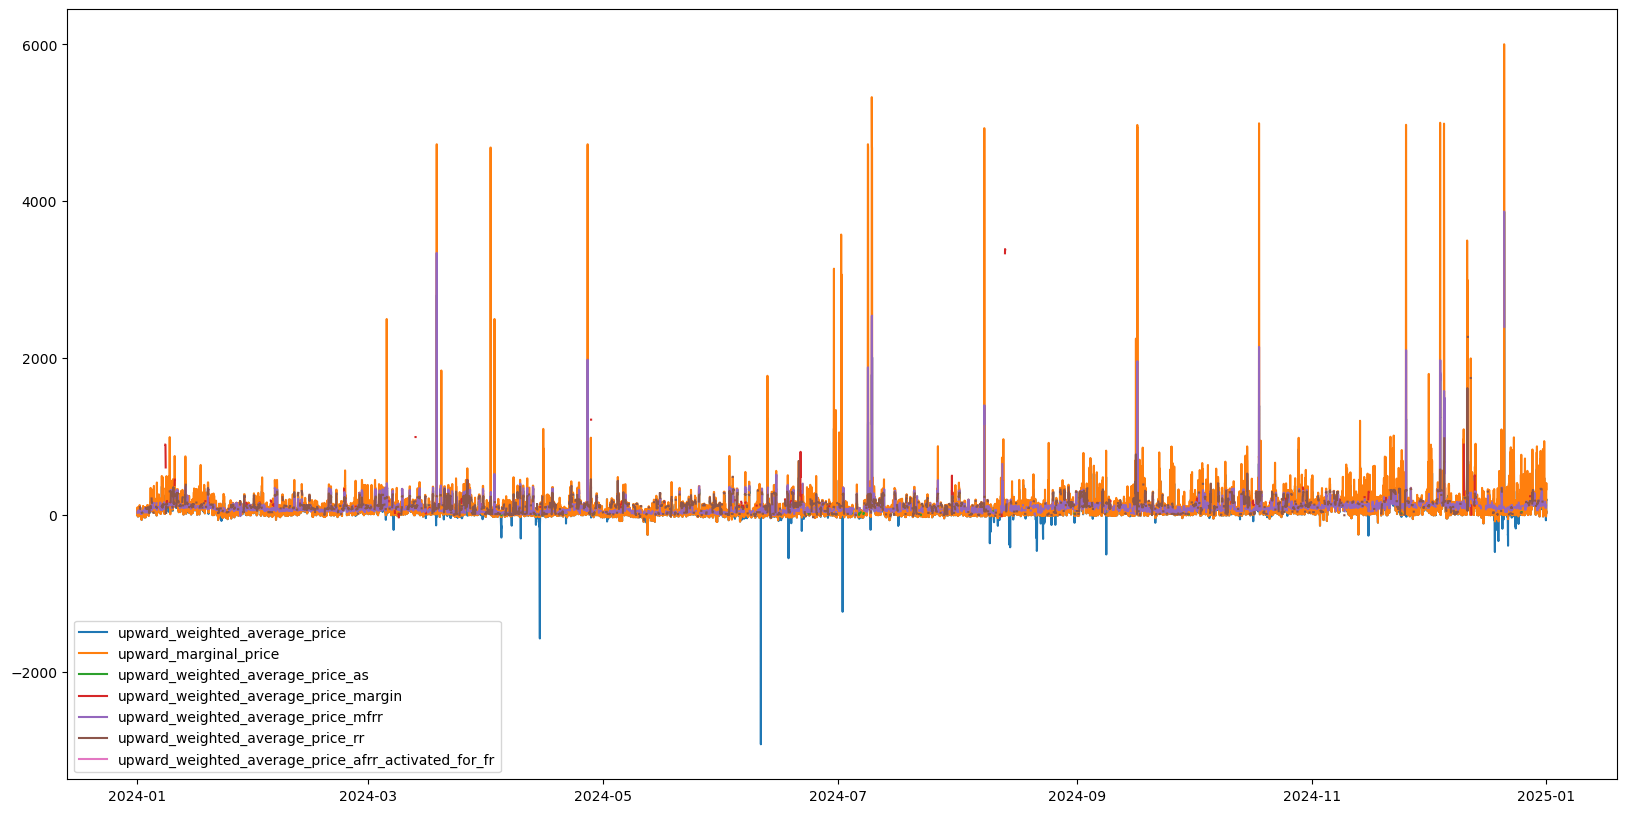

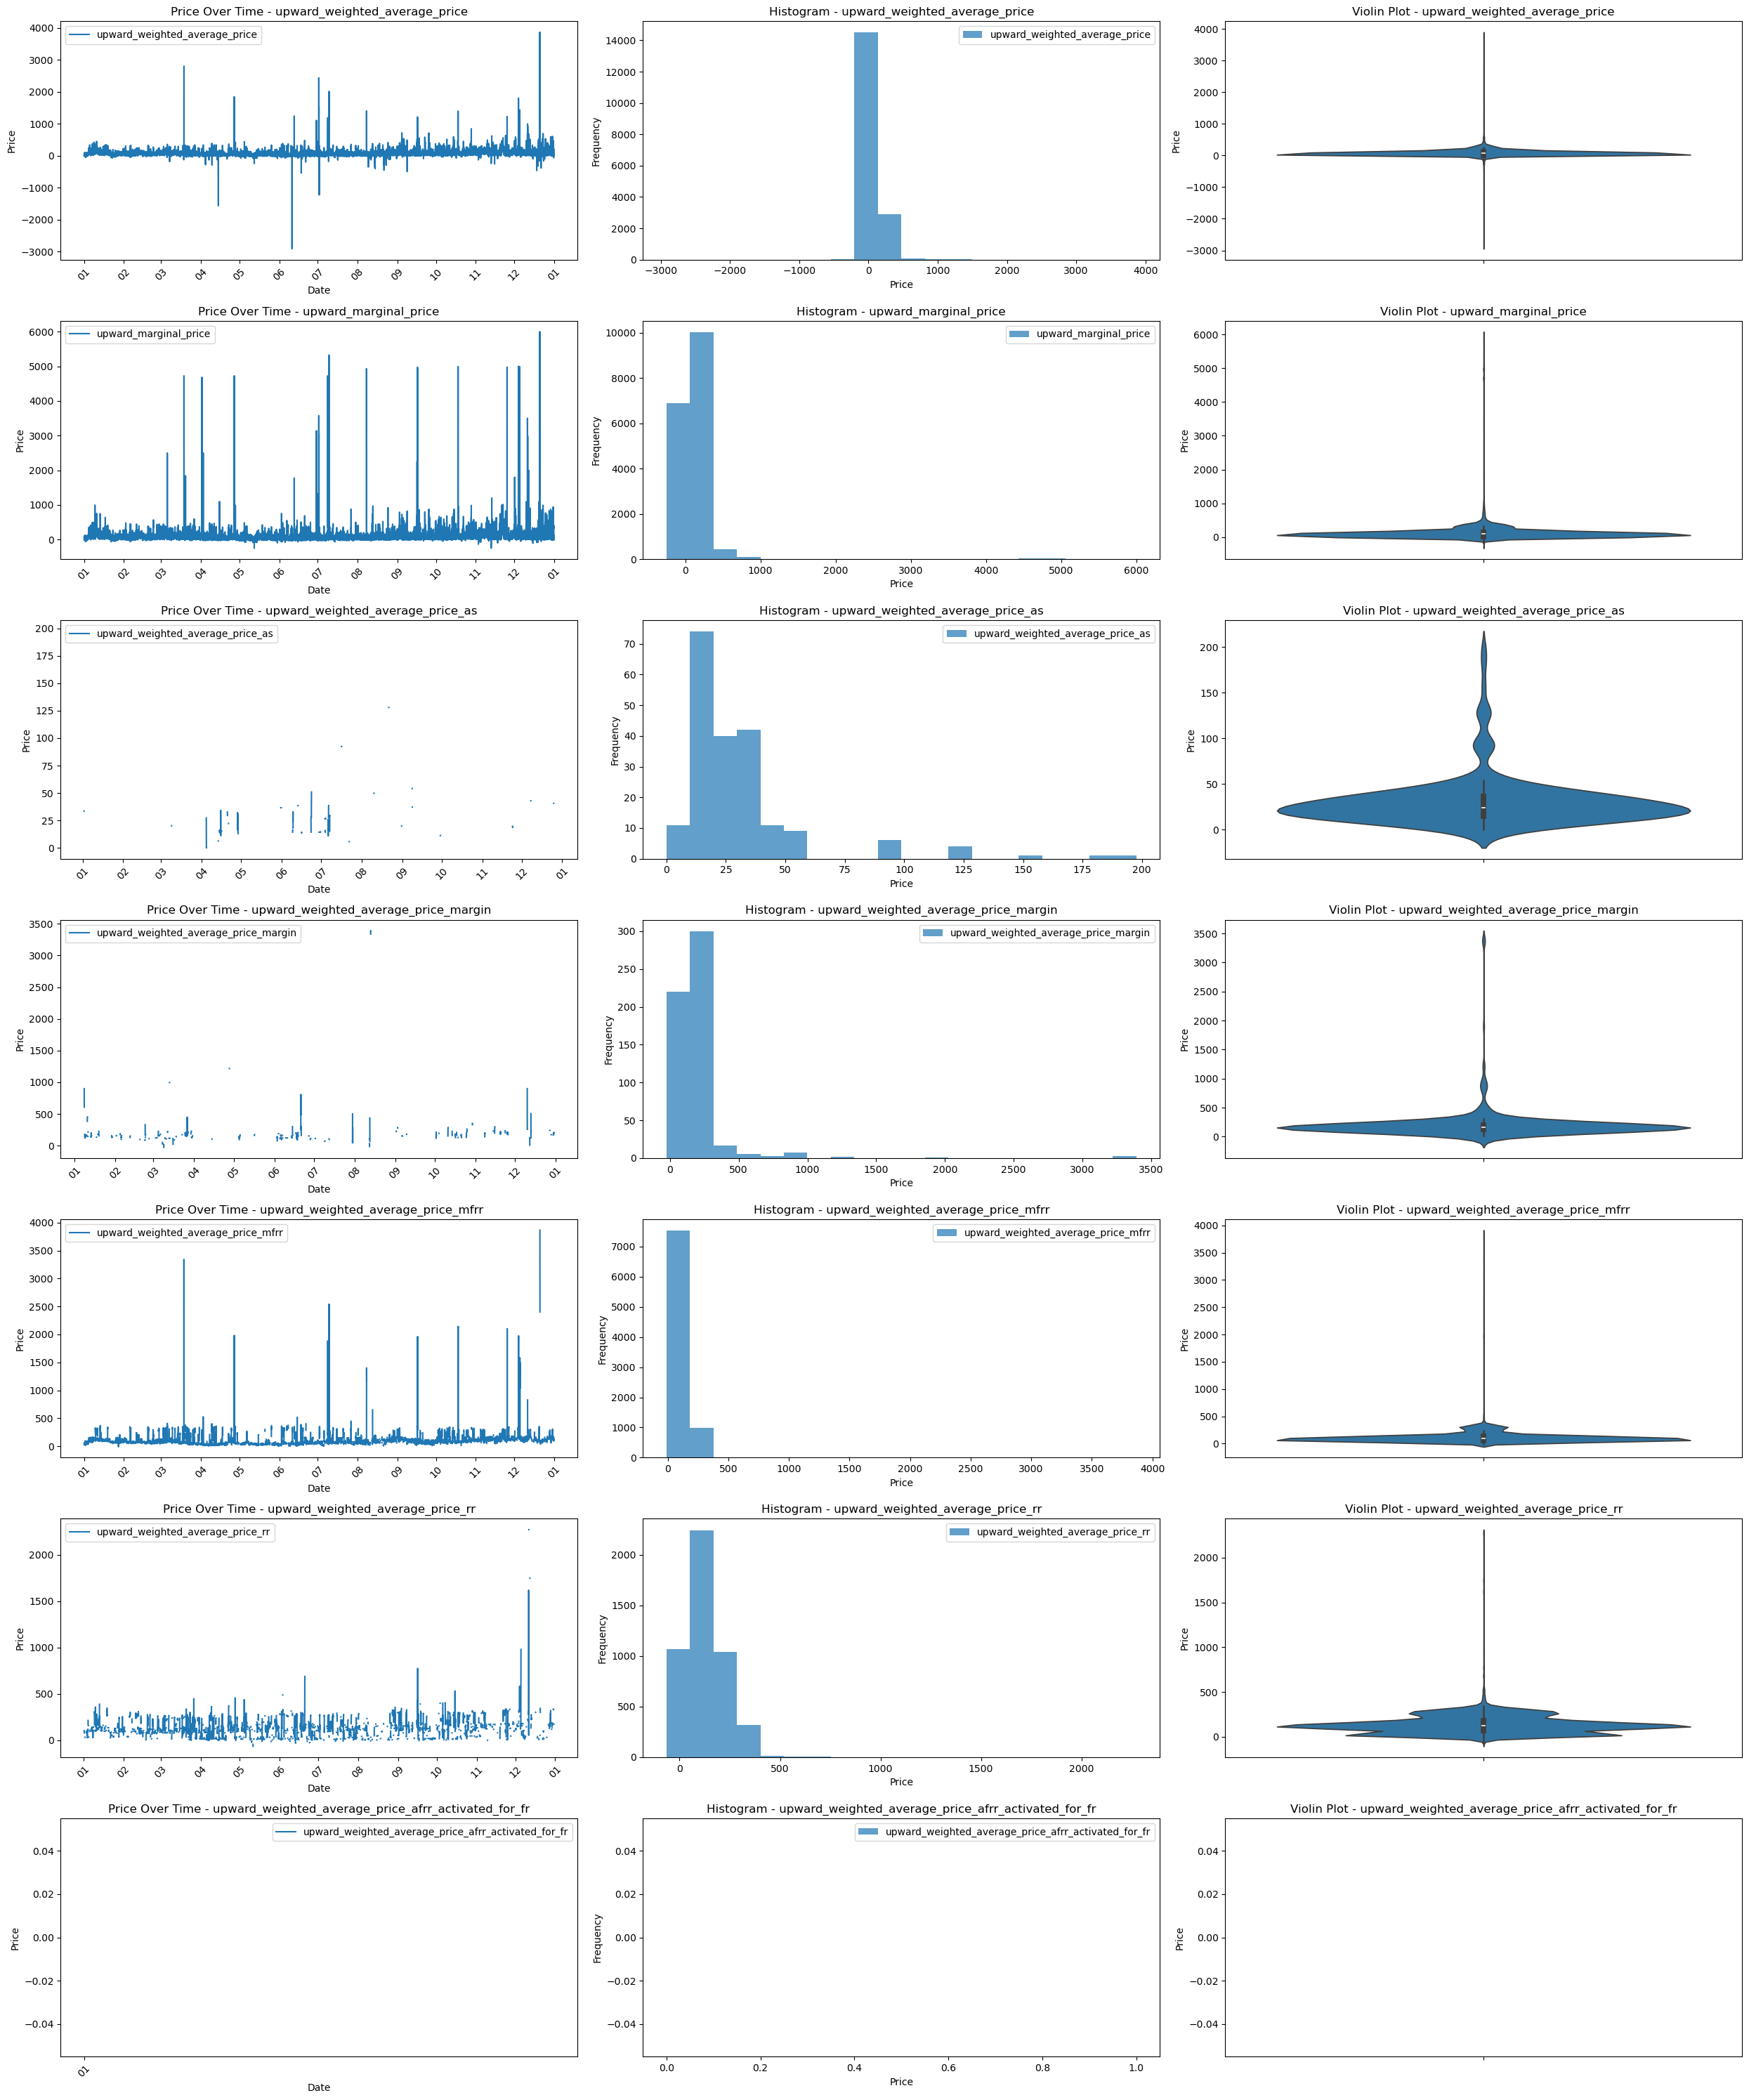

In [ ]:
# print(Price.columns)
# col=Price.columns
# date = pd.to_datetime(Price[col[0]])  # Assurez-vous que la colonne 'Date' est au format datetime
# plt.figure(figsize=(20,10))
# Y=Price[col[[2,4,6,8,10,12,14]]]
# plt.plot(date,Y,label=col[[2,4,6,8,10,12,14]])
# plt.legend()

# # Création des sous-graphiques pour chaque série de prix
# fig, axes = plt.subplots(nrows=len(Y.columns), ncols=3, figsize=(25, 30))  # Une ligne par série de prix, 3 colonnes

# for i, ax_row in enumerate(axes):
#     if i < len(Y.columns):
#         # Graphique linéaire
#         ax_row[0].plot(date, Y.iloc[:, i], label=Y.columns[i])
#         ax_row[0].set_title(f'Price Over Time - {Y.columns[i]}')
#         ax_row[0].set_xlabel('Date')
#         ax_row[0].set_ylabel('Price')
#         ax_row[0].legend()
#         ax_row[0].xaxis.set_major_locator(mdates.MonthLocator())
#         ax_row[0].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
#         ax_row[0].tick_params(axis='x', rotation=45)

#         # Histogramme
#         ax_row[1].hist(Y.iloc[:, i].dropna(), bins=20, alpha=0.7, label=Y.columns[i])
#         ax_row[1].set_title(f'Histogram - {Y.columns[i]}')
#         ax_row[1].set_xlabel('Price')
#         ax_row[1].set_ylabel('Frequency')
#         ax_row[1].legend()

#         # Graphique en violon
#         sns.violinplot(y=Y.iloc[:, i], ax=ax_row[2])
#         ax_row[2].set_title(f'Violin Plot - {Y.columns[i]}')
#         ax_row[2].set_ylabel('Price')

# # Ajuster l'espacement entre les sous-graphiques
# plt.tight_layout()

# # Affichage des graphiques
# plt.show()

C:\Users\adamh\AppData\Local\Temp\ipykernel_5268\1310650091.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  date = pd.to_datetime(Price[col[0]])  # Assurez-vous que la colonne 'Date' est au format datetime


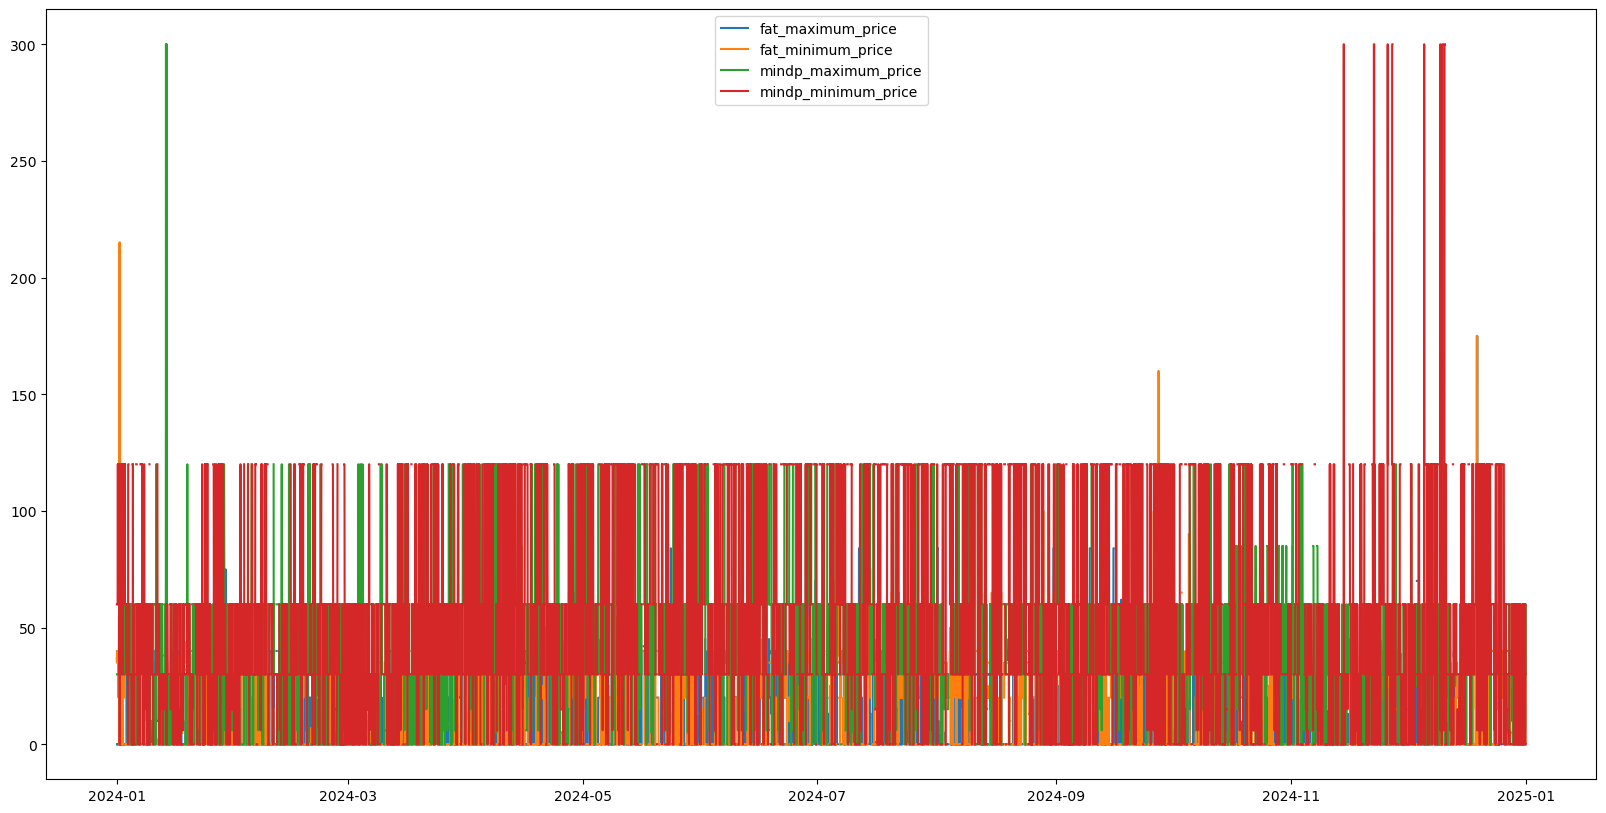

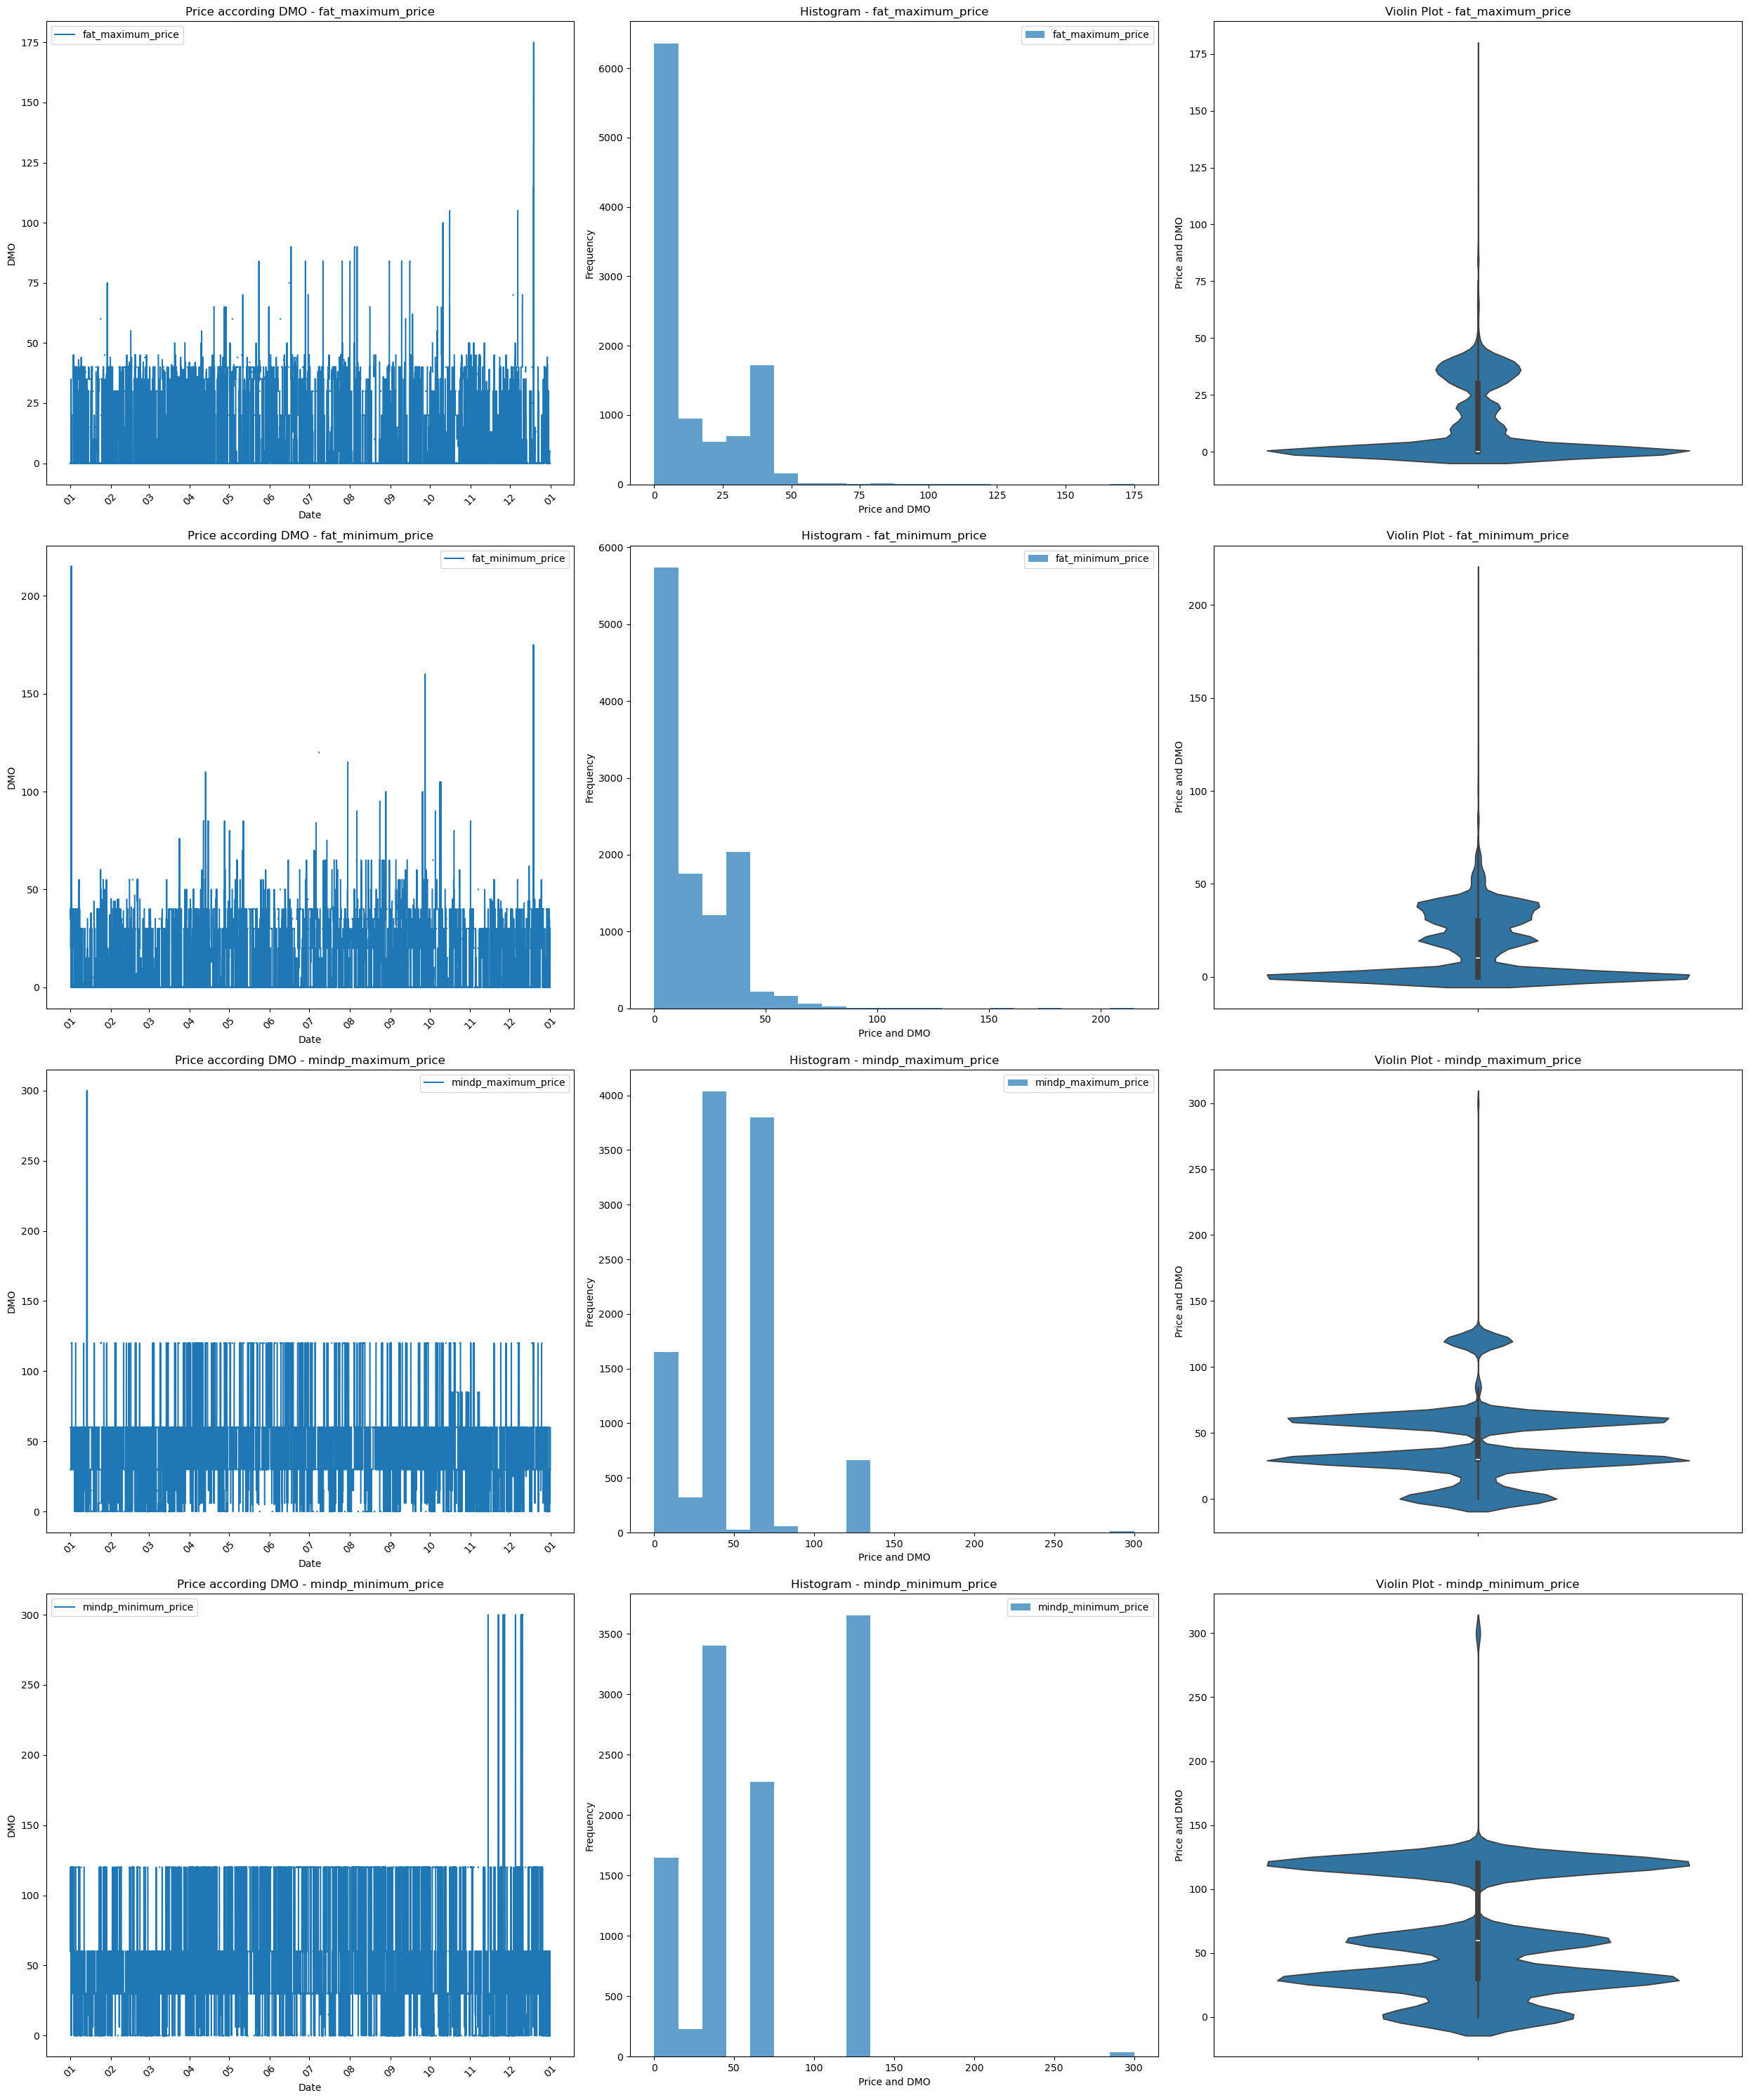

In [ ]:
# dmo=RTE_One_Year(url4)
# col=dmo.columns
# date = pd.to_datetime(Price[col[0]])  # Assurez-vous que la colonne 'Date' est au format datetime
# plt.figure(figsize=(20,10))
# Y=dmo[col[[2,3,4,5]]]
# plt.plot(date,Y,label=col[[2,3,4,5]])
# plt.legend()

# # Création des sous-graphiques pour chaque série de prix
# fig, axes = plt.subplots(nrows=len(Y.columns), ncols=3, figsize=(25, 30))  # Une ligne par série de prix, 3 colonnes

# for i, ax_row in enumerate(axes):
#     if i < len(Y.columns):
#         # Graphique linéaire
#         ax_row[0].plot(date, Y.iloc[:, i], label=Y.columns[i])
#         ax_row[0].set_title(f'Price according DMO - {Y.columns[i]}')
#         ax_row[0].set_xlabel('Date')
#         ax_row[0].set_ylabel('DMO')
#         ax_row[0].legend()
#         ax_row[0].xaxis.set_major_locator(mdates.MonthLocator())
#         ax_row[0].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
#         ax_row[0].tick_params(axis='x', rotation=45)

#         # Histogramme
#         ax_row[1].hist(Y.iloc[:, i].dropna(), bins=20, alpha=0.7, label=Y.columns[i])
#         ax_row[1].set_title(f'Histogram - {Y.columns[i]}')
#         ax_row[1].set_xlabel('Price and DMO')
#         ax_row[1].set_ylabel('Frequency')
#         ax_row[1].legend()

#         # Graphique en violon
#         sns.violinplot(y=Y.iloc[:, i], ax=ax_row[2])
#         ax_row[2].set_title(f'Violin Plot - {Y.columns[i]}')
#         ax_row[2].set_ylabel('Price and DMO')

# # Ajuster l'espacement entre les sous-graphiques
# plt.tight_layout()

# # Affichage des graphiques
# plt.show()

In [15]:
dmo
print(dmo.shape)

(17544, 7)


In [ ]:
volumeReason=RTE_One_Year(url5)
volumeReason.head()

,start_date,end_date,upward_volume_balancing,downward_volume_balancing,upward_volume_congestion,downward_volume_congestion,upward_volume_as,downward_volume_as,upward_volume_margin,downward_volume_margin,updated_date
0,2024-12-31T23:30:00+01:00,2025-01-01T00:00:00+01:00,0.0,51.83,283.00,0.0,0.0,123.59,0.0,0.0,2025-01-16T12:14:10+01:00
1,2024-12-31T23:00:00+01:00,2024-12-31T23:30:00+01:00,0.0,0.00,283.00,0.0,0.0,62.50,0.0,0.0,2024-12-31T23:32:31+01:00
2,2024-12-31T22:30:00+01:00,2024-12-31T23:00:00+01:00,0.0,0.00,283.00,0.0,0.0,62.50,0.0,0.0,2024-12-31T23:02:31+01:00
3,2024-12-31T22:00:00+01:00,2024-12-31T22:30:00+01:00,0.0,0.00,209.67,0.0,0.0,31.50,0.0,0.0,2024-12-31T23:02:31+01:00
4,2024-12-31T21:30:00+01:00,2024-12-31T22:00:00+01:00,0.0,367.50,150.00,0.0,0.0,31.50,0.0,0.0,2024-12-31T22:02:32+01:00


C:\Users\adamh\AppData\Local\Temp\ipykernel_3912\581948334.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  date = pd.to_datetime(Price[col[0]])  # Assurez-vous que la colonne 'Date' est au format datetime


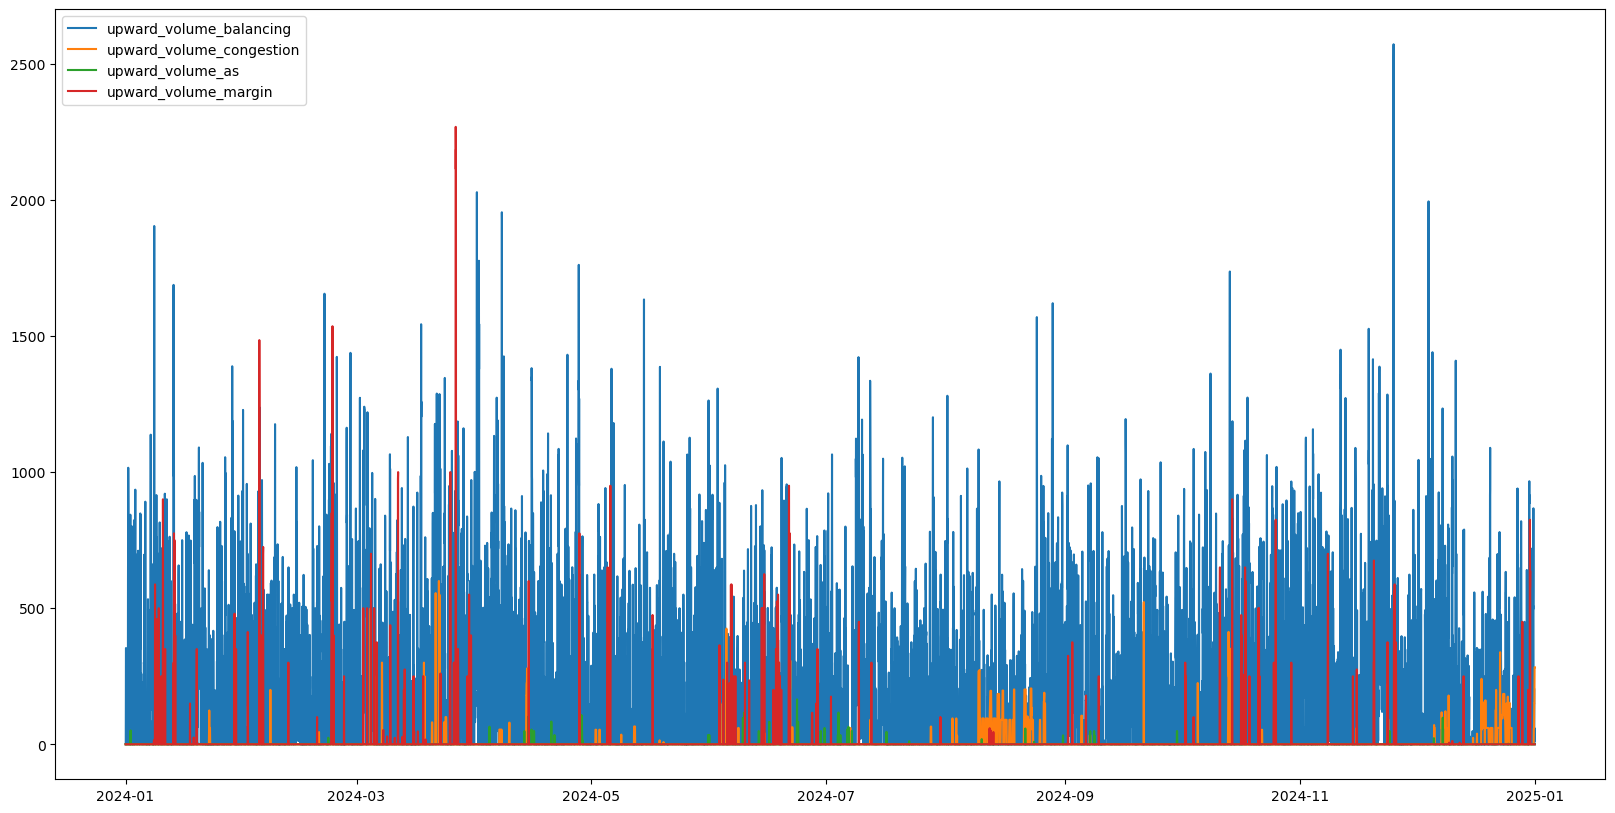

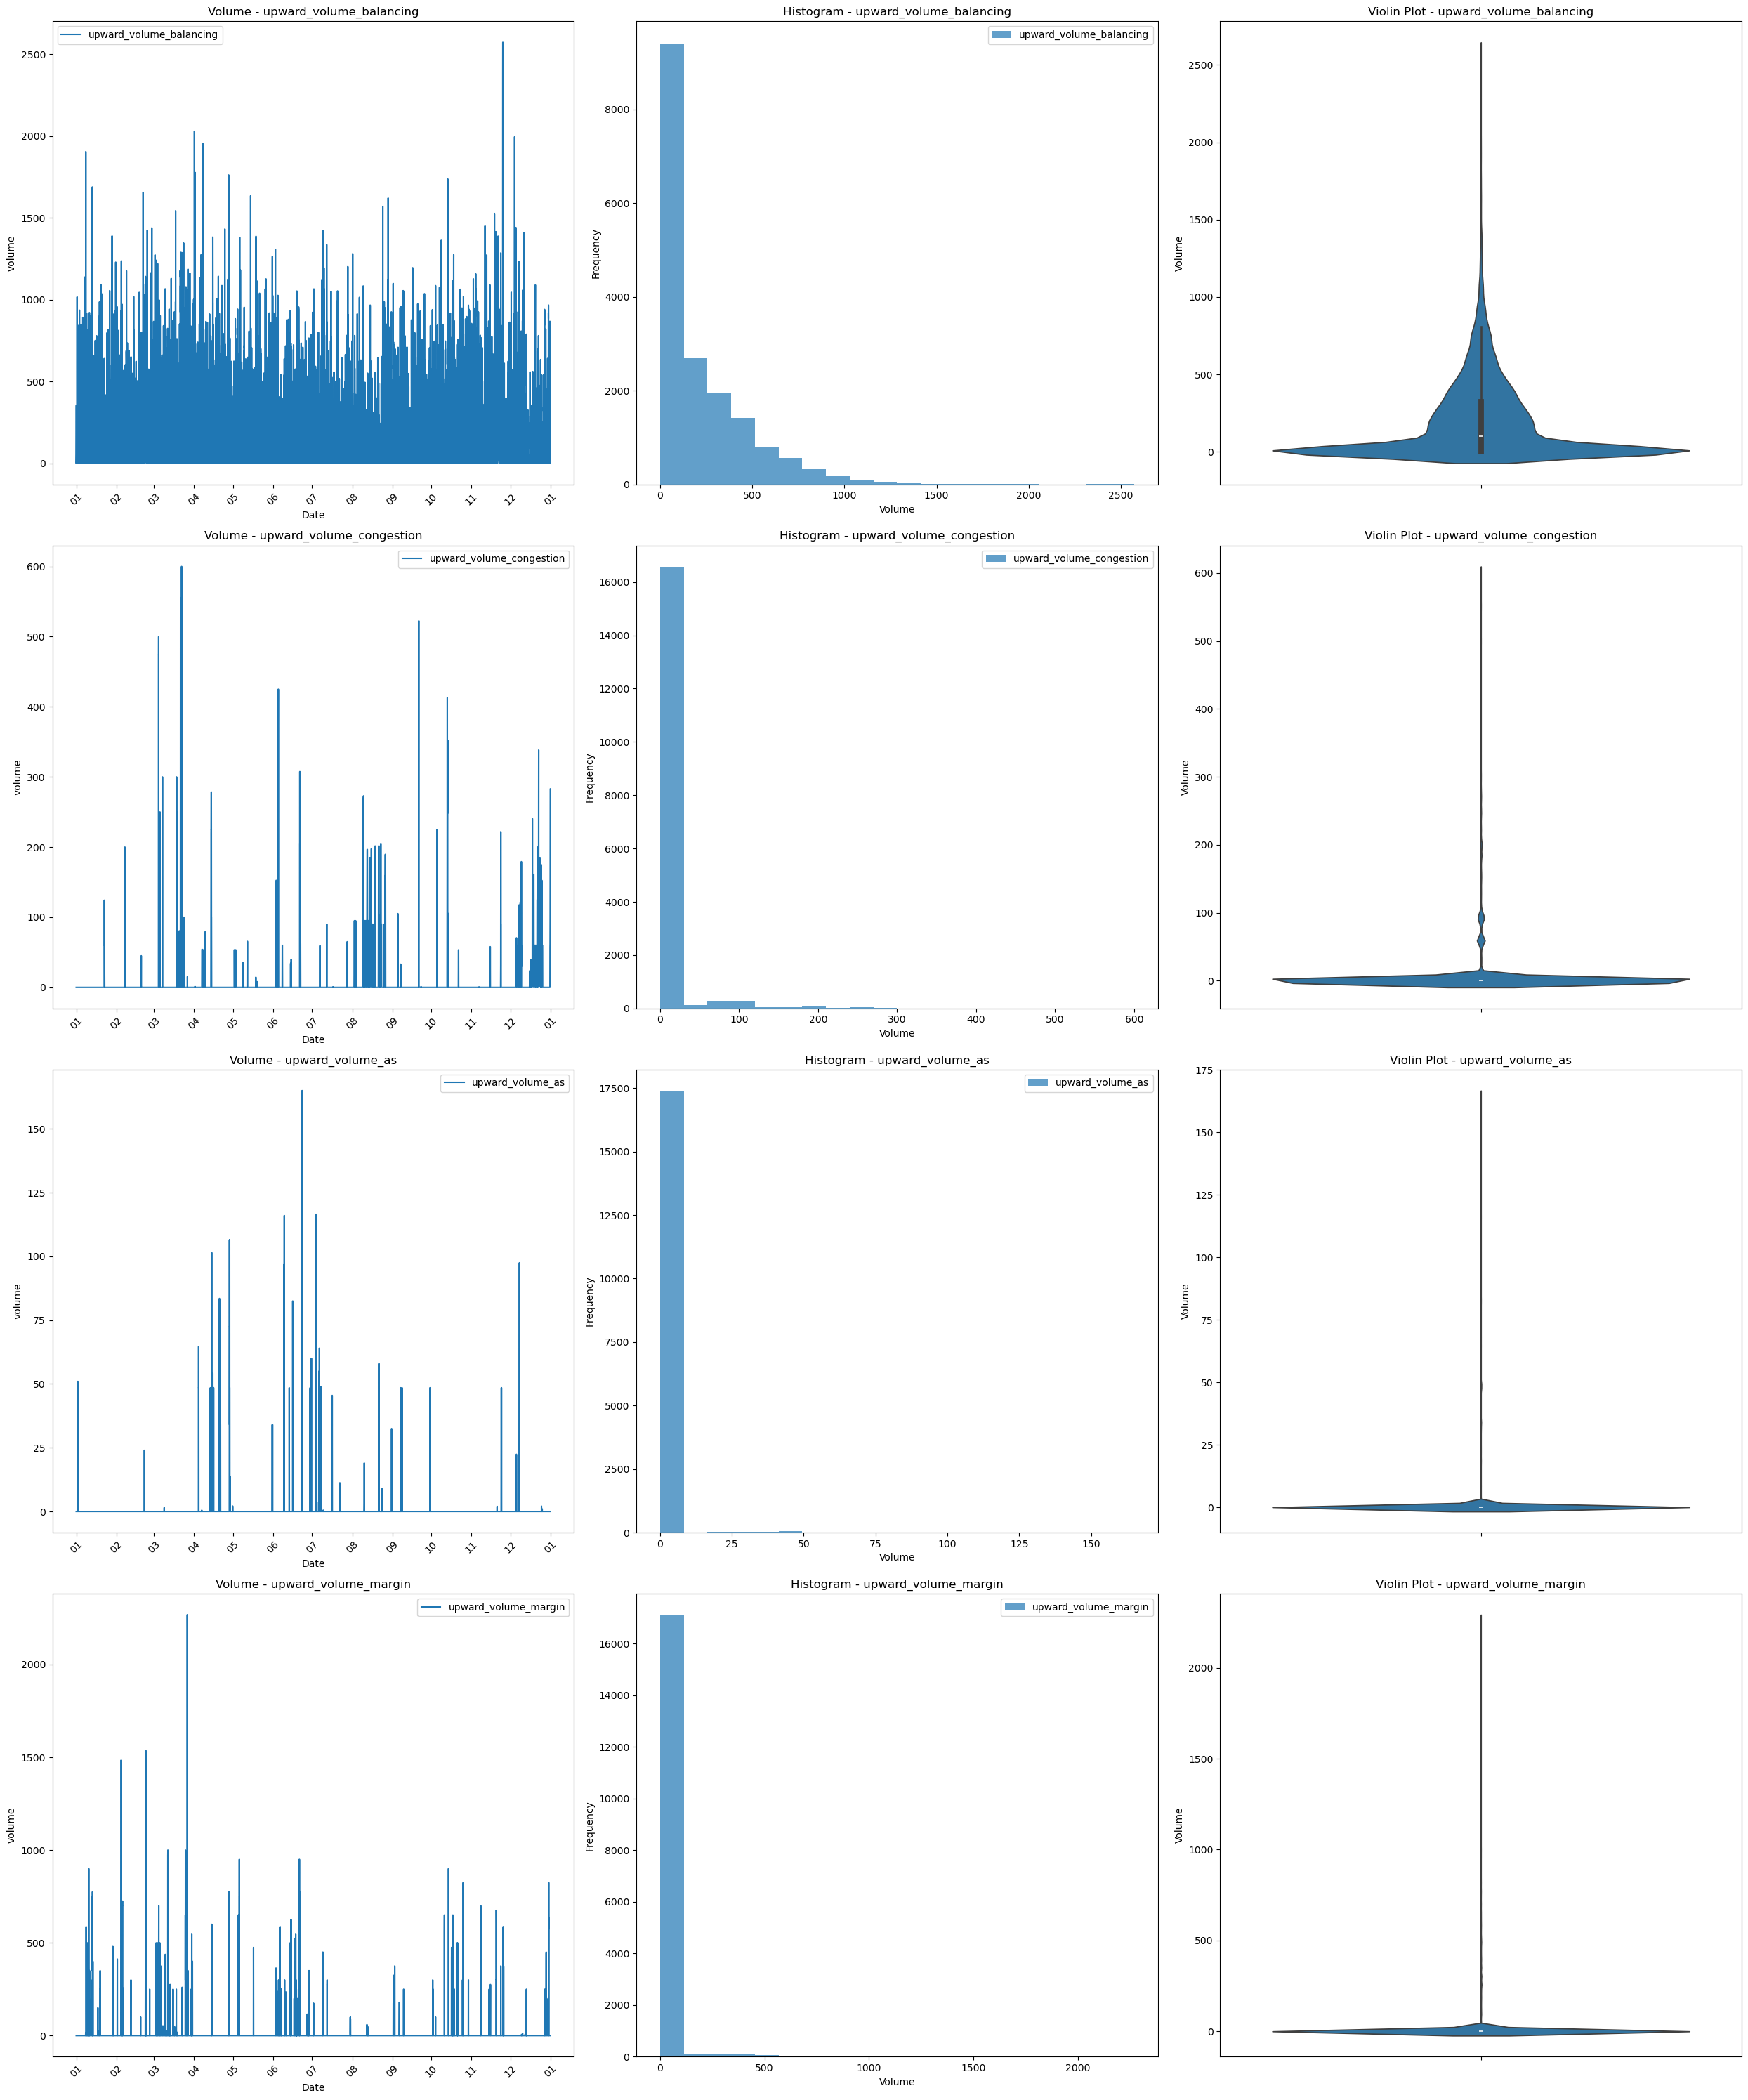

In [ ]:
col=volumeReason.columns
date = pd.to_datetime(Price[col[0]])  # Assurez-vous que la colonne 'Date' est au format datetime
plt.figure(figsize=(20,10))
Y=volumeReason[col[[2,4,6,8]]]
plt.plot(date,Y,label=col[[2,4,6,8]])
plt.legend()

# Création des sous-graphiques pour chaque série de prix
fig, axes = plt.subplots(nrows=len(Y.columns), ncols=3, figsize=(25, 30))  # Une ligne par série de prix, 3 colonnes

for i, ax_row in enumerate(axes):
    if i < len(Y.columns):
        # Graphique linéaire
        ax_row[0].plot(date, Y.iloc[:, i], label=Y.columns[i])
        ax_row[0].set_title(f'Volume - {Y.columns[i]}')
        ax_row[0].set_xlabel('Date')
        ax_row[0].set_ylabel('volume')
        ax_row[0].legend()
        ax_row[0].xaxis.set_major_locator(mdates.MonthLocator())
        ax_row[0].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
        ax_row[0].tick_params(axis='x', rotation=45)

        # Histogramme
        ax_row[1].hist(Y.iloc[:, i].dropna(), bins=20, alpha=0.7, label=Y.columns[i])
        ax_row[1].set_title(f'Histogram - {Y.columns[i]}')
        ax_row[1].set_xlabel('Volume')
        ax_row[1].set_ylabel('Frequency')
        ax_row[1].legend()

        # Graphique en violon
        sns.violinplot(y=Y.iloc[:, i], ax=ax_row[2])
        ax_row[2].set_title(f'Violin Plot - {Y.columns[i]}')
        ax_row[2].set_ylabel('Volume')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()

In [ ]:
RTE_One_Year(url6)

C:\Users\adamh\AppData\Local\Temp\ipykernel_3912\4182981131.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(L, ignore_index=True)


,start_date,end_date,upward_volume_injection,downward_volume_injection,upward_volume_withdrawal,downward_volume_withdrawal,upward_volume_exchange,downward_volume_exchange,upward_volume_balit,downward_volume_balit,updated_date
0,2024-01-31T23:30:00+01:00,2024-02-01T00:00:00+01:00,255.74,0.00,NaN,NaN,NaN,NaN,None,None,2024-03-30T20:30:53+01:00
1,2024-01-31T23:00:00+01:00,2024-01-31T23:30:00+01:00,402.30,0.00,NaN,NaN,NaN,NaN,None,None,2024-03-30T20:30:53+01:00
2,2024-01-31T22:30:00+01:00,2024-01-31T23:00:00+01:00,0.00,50.27,NaN,NaN,40.0,NaN,None,None,2024-03-30T20:30:53+01:00
3,2024-01-31T22:00:00+01:00,2024-01-31T22:30:00+01:00,0.00,13.29,NaN,NaN,40.0,NaN,None,None,2024-03-30T20:30:53+01:00
4,2024-01-31T21:30:00+01:00,2024-01-31T22:00:00+01:00,0.52,222.96,NaN,NaN,NaN,NaN,None,None,2024-03-30T20:30:53+01:00
...,...,...,...,...,...,...,...,...,...,...,...
17539,2024-01-01T03:00:00+01:00,2024-01-01T03:30:00+01:00,363.05,223.63,NaN,NaN,NaN,375.0,None,None,2024-12-04T17:12:52+01:00
17540,2024-01-01T02:30:00+01:00,2024-01-01T03:00:00+01:00,131.19,212.61,NaN,NaN,NaN,650.0,None,None,2024-12-04T17:12:52+01:00
17541,2024-01-01T02:00:00+01:00,2024-01-01T02:30:00+01:00,0.00,213.67,NaN,NaN,NaN,650.0,None,None,2024-12-04T17:12:52+01:00
17542,2024-01-01T01:30:00+01:00,2024-01-01T02:00:00+01:00,0.00,20.76,NaN,NaN,NaN,512.5,None,None,2024-12-04T17:12:52+01:00


In [ ]:
VolumeType=RTE_One_Year(url7)
VolumeType.head()

C:\Users\adamh\AppData\Local\Temp\ipykernel_3912\3213230143.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(L, ignore_index=True)


,start_date,end_date,upward_volume_fcr,downward_volume_fcr,upward_volume_afrr,downward_volume_afrr,upward_volume_mfrr,downward_volume_mfrr,upward_volume_rr,downward_volume_rr,...,imbalance_netting_volume,countertrading_xb_redispatching_imported_volume,countertrading_xb_redispatching_exported_volume,tso_mutual_emergency_imported_volume,tso_mutual_emergency_exported_volume,xb_balancing_imported_volume,xb_balancing_exported_volume,upward_volume_need_rte,downward_volume_need_rte,updated_date
0,2024-12-31T23:30:00+01:00,2025-01-01T00:00:00+01:00,25.19,22.96,285.32,0.38,NaN,NaN,NaN,51.83,...,-20.14,215.5,NaN,NaN,NaN,None,None,NaN,NaN,2025-01-16T12:14:11+01:00
1,2024-12-31T23:00:00+01:00,2024-12-31T23:30:00+01:00,40.33,18.59,295.02,0.00,NaN,NaN,NaN,NaN,...,-58.96,215.5,NaN,NaN,NaN,None,None,NaN,NaN,2024-12-31T23:32:33+01:00
2,2024-12-31T22:30:00+01:00,2024-12-31T23:00:00+01:00,25.77,15.39,123.72,1.68,NaN,NaN,NaN,NaN,...,-118.39,92.5,NaN,NaN,NaN,None,None,NaN,NaN,2024-12-31T23:02:34+01:00
3,2024-12-31T22:00:00+01:00,2024-12-31T22:30:00+01:00,73.36,1.11,41.66,59.45,NaN,NaN,NaN,NaN,...,-18.80,92.5,NaN,NaN,NaN,None,None,NaN,NaN,2024-12-31T22:32:34+01:00
4,2024-12-31T21:30:00+01:00,2024-12-31T22:00:00+01:00,8.77,43.75,0.00,219.86,NaN,NaN,NaN,225.00,...,57.97,92.5,NaN,NaN,NaN,None,None,NaN,142.5,2024-12-31T22:02:35+01:00


C:\Users\adamh\AppData\Local\Temp\ipykernel_3912\1528305420.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  date = pd.to_datetime(VolumeType[col[0]])  # Assurez-vous que la colonne 'Date' est au format datetime


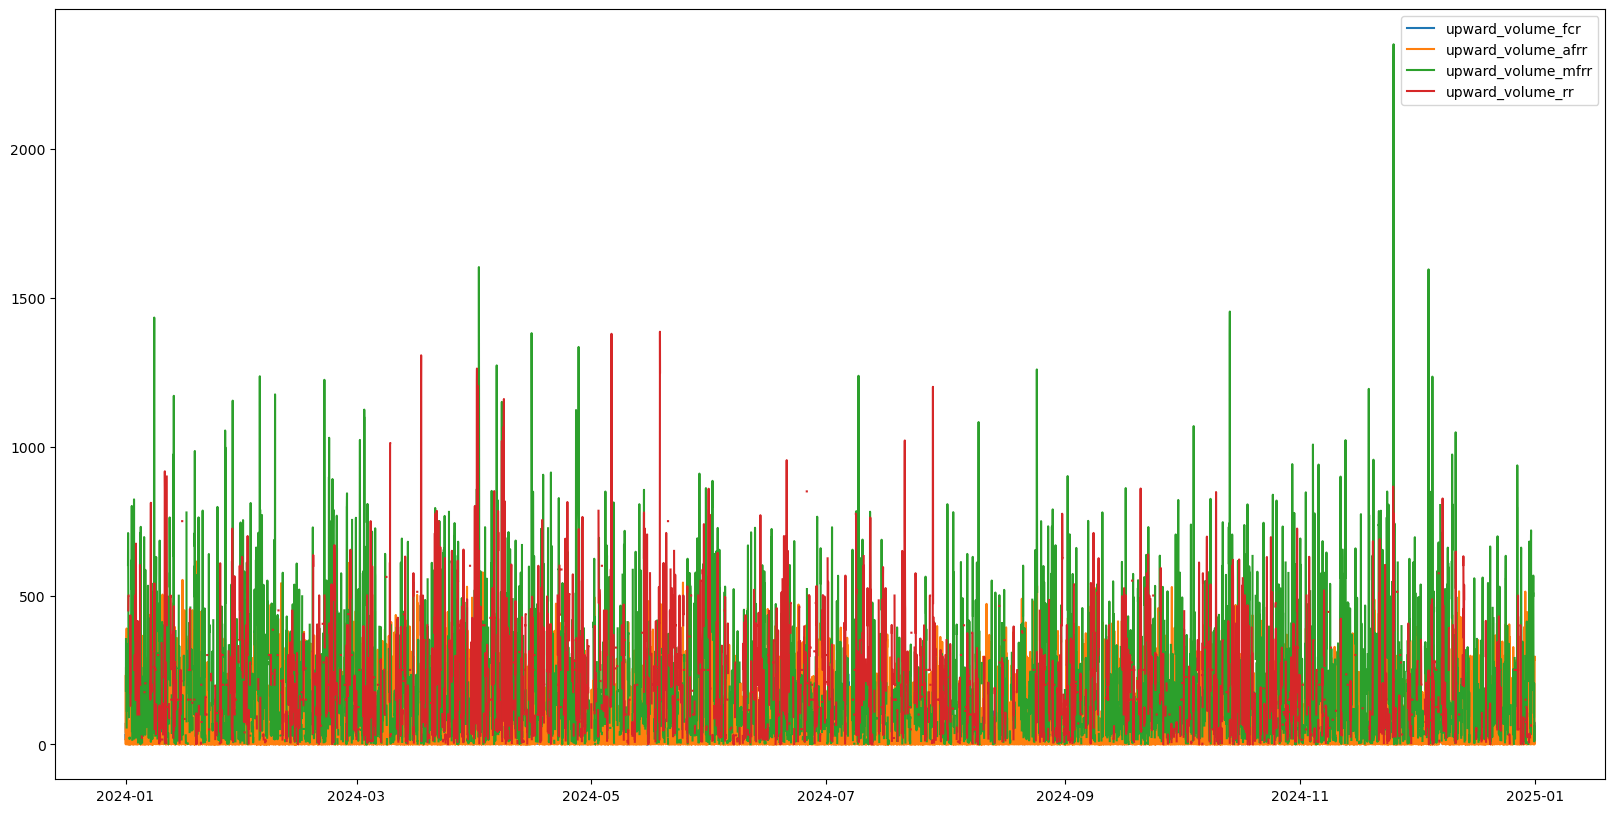

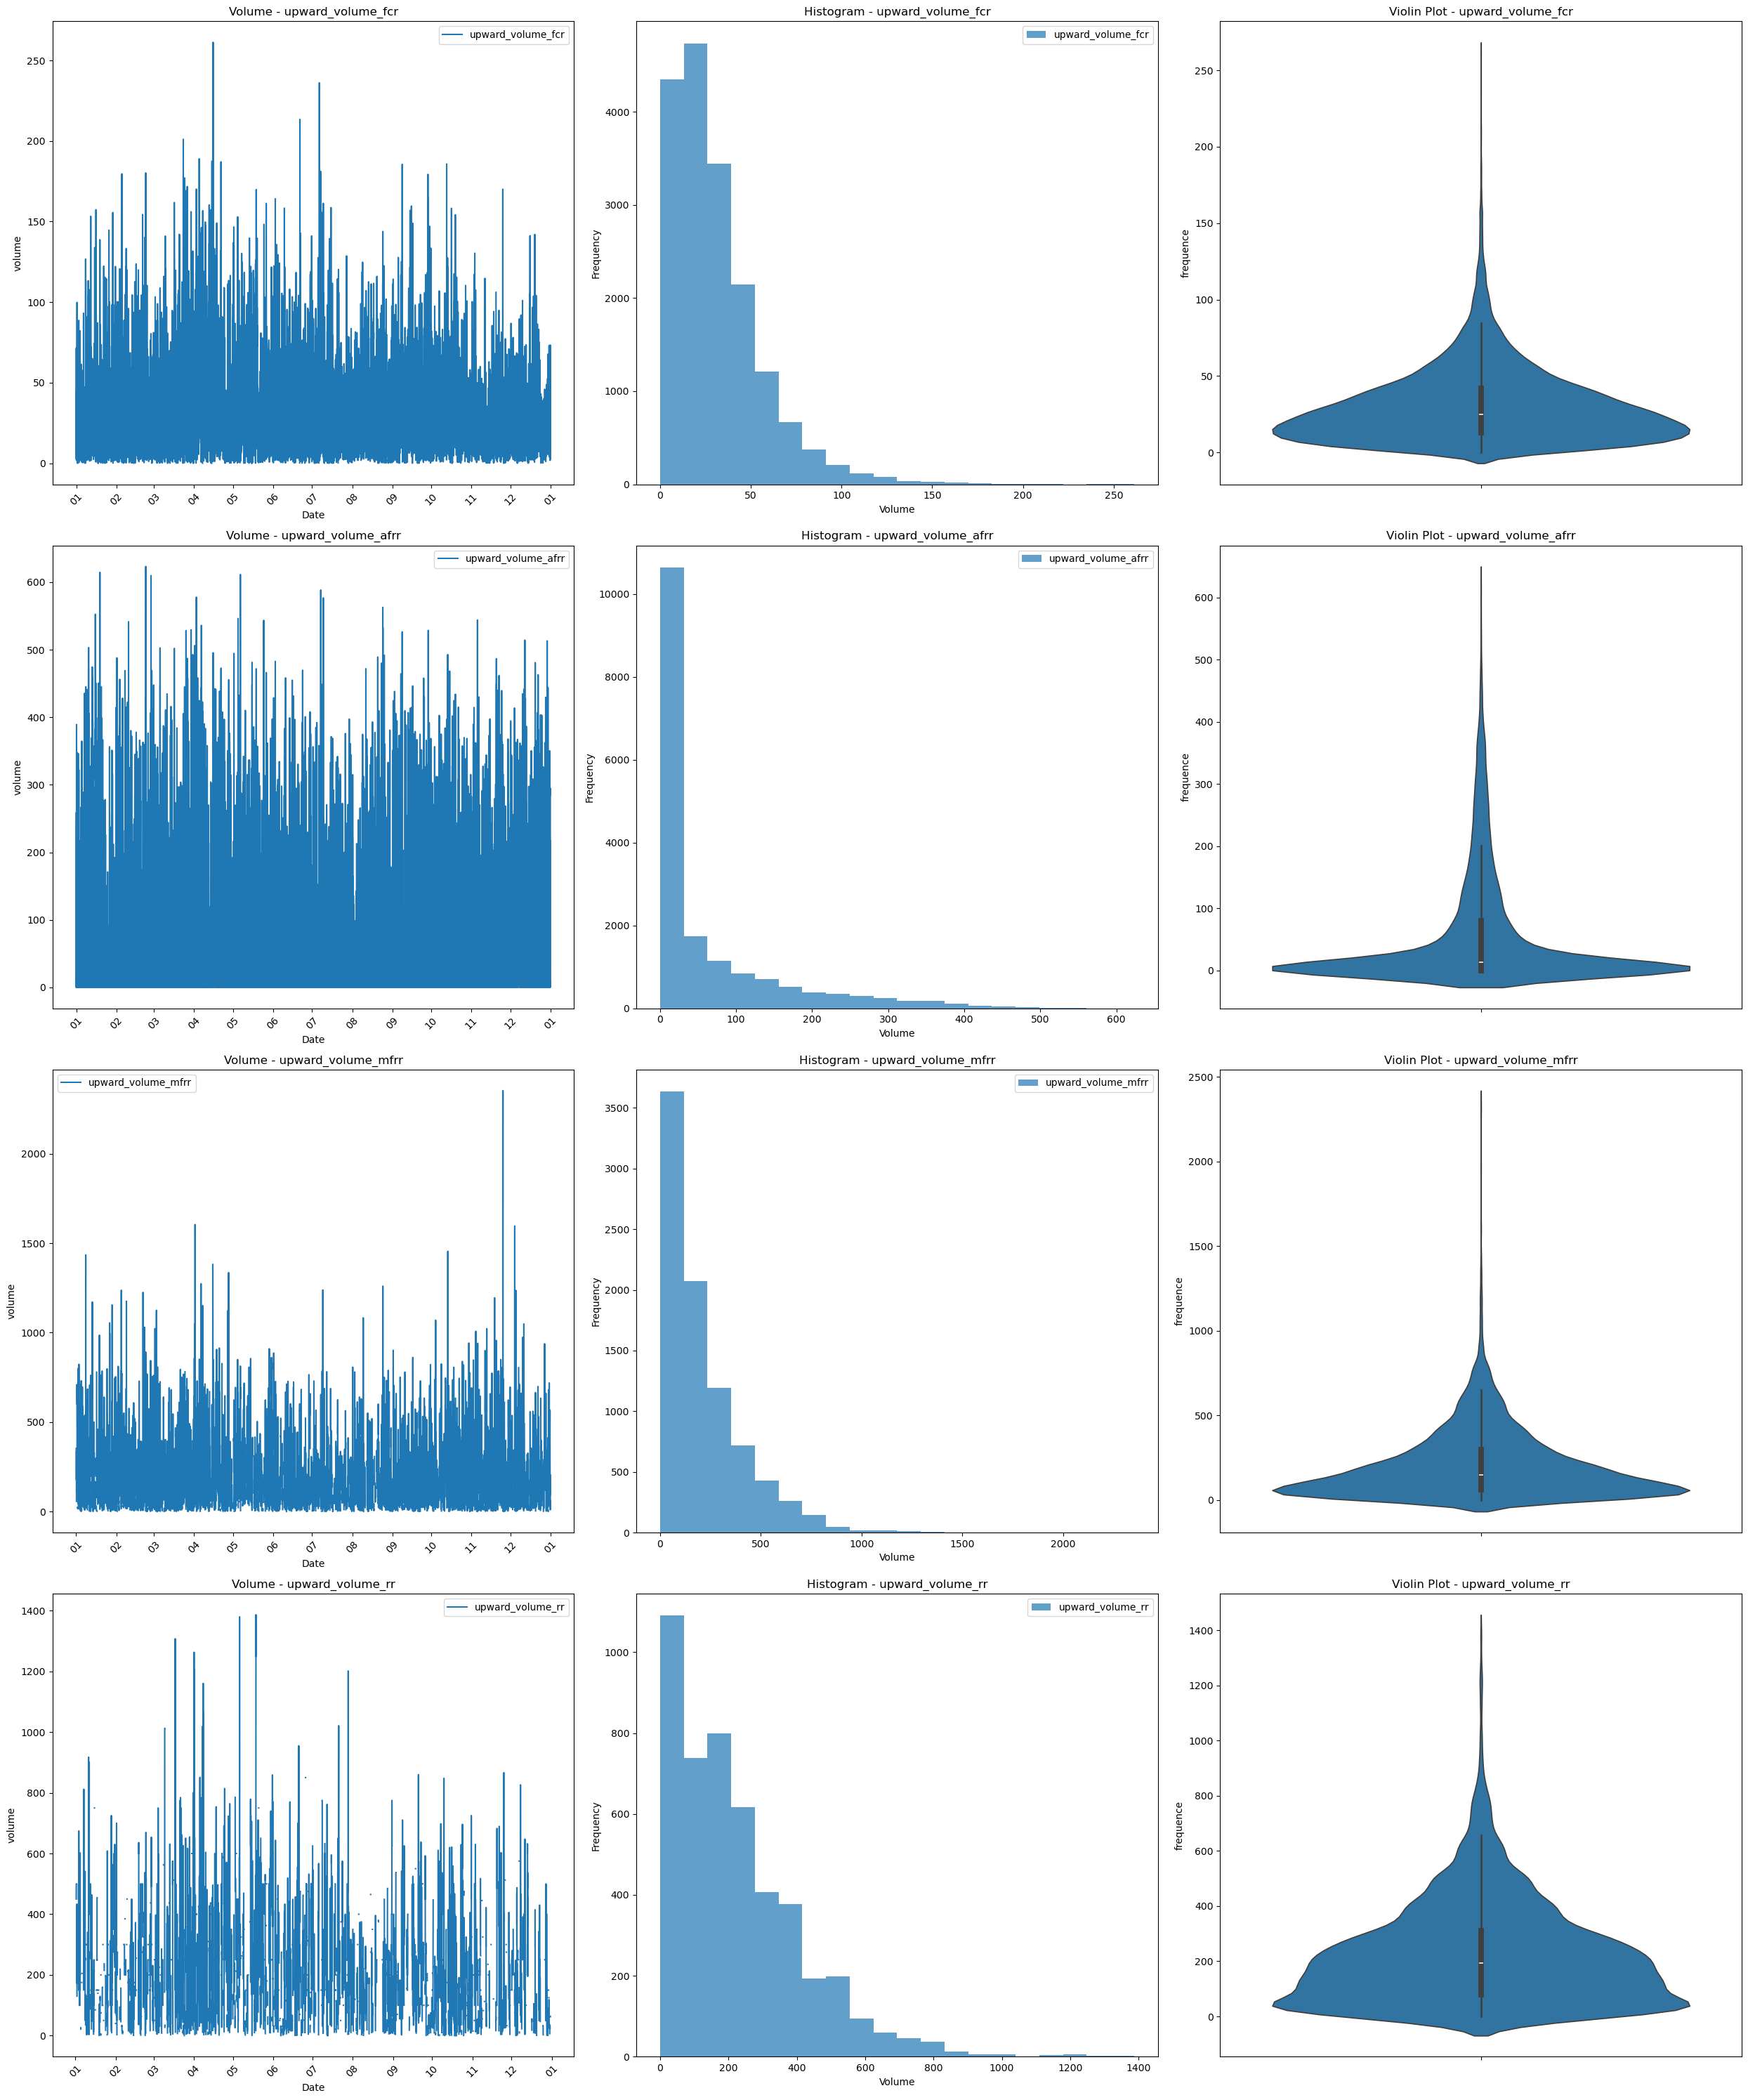

In [ ]:
# col=VolumeType.columns
# date = pd.to_datetime(VolumeType[col[0]])  # Assurez-vous que la colonne 'Date' est au format datetime
# plt.figure(figsize=(20,10))
# Y=VolumeType[col[[2,4,6,8]]]
# plt.plot(date,Y,label=col[[2,4,6,8]])
# plt.legend()

# # Création des sous-graphiques pour chaque série de prix
# fig, axes = plt.subplots(nrows=len(Y.columns), ncols=3, figsize=(25, 30))  # Une ligne par série de prix, 3 colonnes

# for i, ax_row in enumerate(axes):
#     if i < len(Y.columns):
#         # Graphique linéaire
#         ax_row[0].plot(date, Y.iloc[:, i], label=Y.columns[i])
#         ax_row[0].set_title(f'Volume - {Y.columns[i]}')
#         ax_row[0].set_xlabel('Date')
#         ax_row[0].set_ylabel('volume')
#         ax_row[0].legend()
#         ax_row[0].xaxis.set_major_locator(mdates.MonthLocator())
#         ax_row[0].xaxis.set_major_formatter(mdates.DateFormatter('%m'))
#         ax_row[0].tick_params(axis='x', rotation=45)

#         # Histogramme
#         ax_row[1].hist(Y.iloc[:, i].dropna(), bins=20, alpha=0.7, label=Y.columns[i])
#         ax_row[1].set_title(f'Histogram - {Y.columns[i]}')
#         ax_row[1].set_xlabel('Volume')
#         ax_row[1].set_ylabel('Frequency')
#         ax_row[1].legend()

#         # Graphique en violon
#         sns.violinplot(y=Y.iloc[:, i], ax=ax_row[2])
#         ax_row[2].set_title(f'Violin Plot - {Y.columns[i]}')
#         ax_row[2].set_ylabel('frequence')

# # Ajuster l'espacement entre les sous-graphiques
# plt.tight_layout()

# # Affichage des graphiques
# plt.show()